<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Agent and Multi-Agent Systems </center>
    <center> PW1 : Basic concepts and Mesa Plateform</center>
<hr style=" border:none; height:3px;">
</h1>



### Part 2: The Mesa platform for Python

In [1]:
import mesa
import numpy as np
import matplotlib.pyplot as plt

### 1. Setting up the project

#### Documentation

To help you during this tutorial, we recommend that you bookmark the [Mesa API documentation](https://mesa.readthedocs.io/en/latest/apis/api_main.html).  

#### Mesa Basics

Implementing a multi-agent system in Mesa requires to define two core classes:

- One for multiagent platform: it will inherit the Mesa Model class;
- The other for the agents: it will inherit the Mesa Agent class.

The `Model` class holds the model-level attributes, manages the agents, and generally handles the global level of our agent-based model (hence the same). Each instance of the `Model` class will make a specific run of the multi-agent system.

The `Agent` class is characterized by a step method that implements the procedural loop. It will be called by the model’s scheduler at runtime for the agents to do whatever you have decided they should do. Agents can access to their model with the `self.mode` attribute.

The *scheduler* is a specific component of the model that can be used to control the agent’s runtime. The Mesa platform runs in a synchronous manner and several classes are proposed to ease the scheduling process. They all have in common two properties:

- Their constructor takes an instance of `Model` as parameter;
- They all implement a `step` method that calls the `step` method of each agent once.

In this session, we shall use the Mesa `RandomActivation` scheduler from the `mesa.time` package. Its step method invokes all agents in a random order.

With these three components in mind, take a close look to the skeleton of a Mesa multiagent system:

In [2]:
# This is an example, do not run the entry

from mesa import Agent, Model
from mesa.time import RandomActivation

# let's create a class for our agents
class MyAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        #... define local variables here ...
    def step(self):
        #... define the perception-deliberation-action loop here ...
        pass

# and now let's create a MAS
class MyModel(Model):
    def __init__(self):
        # we need a scheduler
        self.scheduler = RandomActivation(self)
        # we need to create agent
        a = MyAgent(id, self) # id is generally a number; it must be a different value for each agents
        self.scheduler.add(a) # don't forget to add the agent to the scheduler

    # and now, we can define methods to control the runtime of the platform
    # here are three examples

    # 1. this method performs only 1 step for all agents
    def one_step(self):
        self.scheduler.step()
    # 2. this method performs only n steps for all agents
    def run_n_steps(self,n):
        for i in range(n):
            self.one_step()
    # 3. this method runs the agent until you stop the code manually
    def run_continuously(self):
        while(True):
            self.one_step()

# This is how you start the MAS:
m = MyModel()
m.run_n_steps(5)

The `one_step`, `run_n_step` and `run_continuously` methods are not mandatory: they illustrate the fact that running the agents is done by the scheduler's `step` method, which must be invoked from the model. In this skeleton, our model class creates a random activation scheduler and adds agents to this scheduler. The agent class must define the content of the `step` method that will be called by the scheduler.

<div class="alert alert-block alert-info"> 

 <b>Questions</b>
    
Based on the above example, implement a simple Mesa multi-agent system with `N` agents that all have some internal variable with an initial value of `0`. The agents' ids will range from`0` to `N-1`. The procedural loop of the agents performs two actions:

- Increase the value of the internal value by `1`;
- Print the agent's number and its current internal value.

Running three steps of the system with `N=4` should produce the following output (with the agents in random a order):
</div> 



Agent 2 has value 1

Agent 3 has value 1

Agent 1 has value 1

Agent 0 has value 1

Agent 1 has value 2

Agent 2 has value 2

Agent 3 has value 2

Agent 0 has value 2

Agent 0 has value 3

Agent 1 has value 3

Agent 3 has value 3

Agent 2 has value 3

In [8]:
#Answer

from mesa import Agent, Model
from mesa.time import RandomActivation

class MyAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.score = 0

    def step(self):
        self.score += 1
        print("Agent", self.unique_id, "has a score of", self.score)

class MyModel(Model):
    def __init__(self, N):
        self.scheduler = RandomActivation(self)
        for i in range(N):
            a = MyAgent(i, self)
            self.scheduler.add(a)

    def one_step(self):
        self.scheduler.step()
    
    def n_steps(self, n):
        for _ in range(n):
            self.scheduler.step()

# start the MAS:
m = MyModel(5)
# m.one_step()
m.n_steps(4)

Agent 1 has a score of 1
Agent 0 has a score of 1
Agent 3 has a score of 1
Agent 2 has a score of 1
Agent 4 has a score of 1
Agent 0 has a score of 2
Agent 4 has a score of 2
Agent 3 has a score of 2
Agent 1 has a score of 2
Agent 2 has a score of 2
Agent 3 has a score of 3
Agent 0 has a score of 3
Agent 4 has a score of 3
Agent 2 has a score of 3
Agent 1 has a score of 3
Agent 4 has a score of 4
Agent 1 has a score of 4
Agent 2 has a score of 4
Agent 3 has a score of 4
Agent 0 has a score of 4


### 2. The Money Example

Our goal is to implement a simple agent model in which each agent has only one variable that represents **how much wealth it currently has** (each agent will also have a unique identifier as in the example above). We want the agent to adopt the following behaviour at each step of their execution (i.e. in their procedural loop):

- Check their wealth;
- If they have the money, give one unit of it away to another random agent.

To allow the agent to choose another agent at random, we shall use the `model.random` random-number generator. This works just like Python’s `random` module, but with a fixed seed set when the model is instantiated, that can be used to replicate a specific model run later. To access an agent's wealth, we can use the scheduler’s internal list of all the agents it is scheduled to activate.

Note that agents also have a `self.random` attribute that refers to `self.model.random`.

In [ ]:
# other_agent = self.random.choice(self.model.scheduler.agents)
# other_agent.any_method()

<div class="alert alert-block alert-info"> 

 <b>Questions</b>
    
- Write a class MoneyAgent that implements an agent with the above behaviour.
- This code violates one of the principles of MAS we have discussed in this course. Which one?
</div> 

In [12]:
#Answer
# environnement fortement couplé : les agents sont très dépendants les uns des autres
# problème : chaque agent touche les variables encapsulées dans les autres agents
# normalement il faut passer par l'environnement pour communiquer entre les agents

from mesa import Agent, Model

class MoneyAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 5

    def step(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.scheduler.agents)
            other_agent.wealth += 1
            self.wealth -= 1

#### The Money MAS model

<div class="alert alert-block alert-info"> 

 <b>Questions</b>

Implement a `MoneyModel` class that creates `N` money-agents. Run some steps of the MAS and store the resulting value of `wealth` for each agent into a Python list. You can then display the result using the matplotlib library:
    
 </div>

In [13]:
import matplotlib.pyplot as plt

class MoneyModel(Model):
    def __init__(self, N):
        self.scheduler = RandomActivation(self)
        #Define parameters
        #Create agents
        for id in range(N):
            a = MoneyAgent(id, self)
            self.scheduler.add(a)

    def run_n_steps(self,n):
        for _ in range(n):
            self.scheduler.step()
    
    def get_all_agents_wealth(self):
        wealth = []
        for agent in self.scheduler.agents:
            wealth.append(agent.wealth)
        return wealth
        
# the test code is in the next cell

[6, 11, 1, 10, 2, 7, 2, 4, 2, 5]


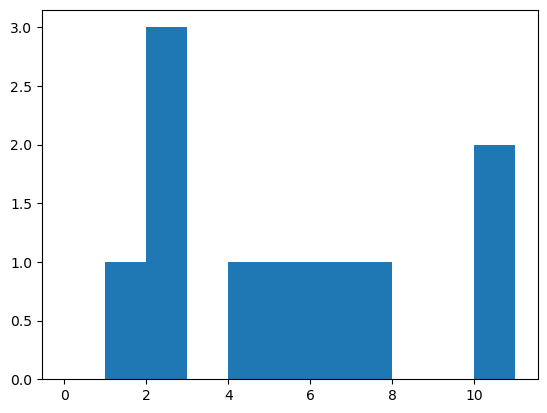

In [17]:
#A possible running -- you may change it.     
model = MoneyModel(10) # 10 agents in our example
model.run_n_steps(50)  # 50 steps in our model
all_wealth = model.get_all_agents_wealth()
print(all_wealth)
plt.hist(all_wealth,bins=range(max(all_wealth)+1))
plt.show()

### 3. Adding a spatial environment

Many agent-based models have a spatial element, with agents moving around and interacting with nearby neighbors. Mesa supports two overall kinds of spaces:

- Grid spaces: they are divided into cells, and agents can only be on a particular cell, like pieces on a chess board;
- Continuous spaces: they allow agents to have any arbitrary position.


Both grids and continuous spaces are frequently toroidal, meaning that the edges wrap around, with cells on the right edge connected to those on the left edge, and the top to the bottom. This prevents some cells having fewer neighbors than others, or agents being able to go off the edge of the environment.

In our simple model, we will use a grid space in which agents walk at random. Instead of giving their unit of money to any random agent, they will give it to an agent on the same cell. We shall use the Mesa `MultiGrid` class that allows multiple agents to be in the same cell (as opposed to `SimpleGrid` which only allows one agent at a time in each cell). Its constructor receives `width` and `height` parameters, and a `boolean` as to whether the grid is toroidal. We can place agents on a grid with the grid’s `place_agent` method, which takes an agent and an `(x, y)` tuple of the coordinates to place the agent.

In [ ]:
#Example

from mesa.space import MultiGrid

# grid = MultiGrid(width, height, toroidal)

# grid.place_agent(a, (x, y))

All these method should be invoked in the model, at the agents’ creation level.

Each agent is now provided with a `self.pos` variable that indicates its position in the grid. Moving an agent in the space (i.e. changing its position’s value) is done with the `move_agent` method, which is typically invoked in the agent’s `step` method. It takes as parameter the agent and its new position `(x,y)`.

In [ ]:
# This code is invoked from within the Agent class :
# - self is the agent
# - self.model is the agent model
# - self.model.grid is the model's grid space

# self.model.grid.move_agent( self, (new_x,new_y) )

Instead of computing the possible positions manually, you can use the `get_neighbrhood` method which returns all the neighbors of a given cell. This method can get two types of cell neighborhoods: **Moore** (including diagonals), and **Von Neumann** (only up/down/left/right). It also needs an argument as to whether to include the center cell itself as one of the neighbors.

In [ ]:
#Example
# possible_positions = grid.get_neighborhood( (x,y), moore=True, include_center=False )

# moving an agent to a random position in this list is then easy:
# new_position = model.random.choice(possible_positions)
# grid.move_agent(agent, new_position)

Last but not least, one can get the list of agents that occupy a given cell with:

In [ ]:
#Example
# cellmates = self.model.grid.get_cell_list_contents([self.pos])

#cellmates is a list of agents.

<div class="alert alert-block alert-info"> 

 <b>Questions</b>

Modify the previous code (MoneyMAS Model) so that :

- The model receives a `width` and `height` as parameters to initiate a toroidal grid space;
- All agents are positioned randomly in the space;
- At each step, all agents move randomly and then exchange `wealth` with the agents that share their current cell.

 To make your code easier to read, we recommend that you write two methods in your `MoneyAgent` class:

- The `move` method moves the agent to one of its neighbouring cells;
- The `share` method modifies the wealth, by sharing the wealth with agents in the sale cell.
    
 </div>

In [28]:
#Answer

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

class MoneyAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 5
    def move(self):
        possible_positions = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_positions)
        self.model.grid.move_agent(self, new_position)

    def share(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            random_cellmmate = self.random.choice(cellmates)
            random_cellmmate.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        self.share()

class MoneyModel(Model):
    def __init__(self, N, width, height):
        #parameters
        self.scheduler = RandomActivation(self)
        self.grid = MultiGrid(width, height, torus=True)
        for id in range(N):
            a = MoneyAgent(id, self)
            random_x = self.random.randrange(self.grid.width)
            random_y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (random_x, random_y))
            self.scheduler.add(a)
    def run_n_steps(self, n):
        for _ in range(n):
            self.scheduler.step()
    def get_all_agents_wealth(self):
        wealth = []
        for agent in self.scheduler.agents:
            wealth.append(agent.wealth)
        return wealth

[12, 5, 7, 4, 2, -1, 4, 9, 8, 3, 6, 5, 3, 4, 0, 3, 4, 3, 16, 3]


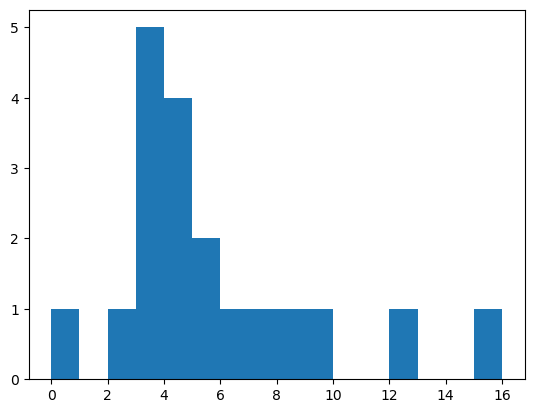

In [37]:
#A possible running

model = MoneyModel(20, 10, 10)  # 20 agents in our example
model.run_n_steps(50)  # 50 steps in our model

all_wealth = model.get_all_agents_wealth()
print(all_wealth)

import matplotlib.pyplot as plt

plt.hist(all_wealth,bins=range(max(all_wealth)+1))
plt.show()

#### Viewing the spatial environment


Viewing the position of agents might be interesting in such a multi-agent system. We can do it quite easily with the `matplotlib` and `numpy` libraries. We create a `numpy` array of the same size as the grid, filled with zeros. Then we use the `coord_iter` method in the `grid` object, which lets us loop over every cell in the grid, giving us each cell’s coordinates and contents in turn.

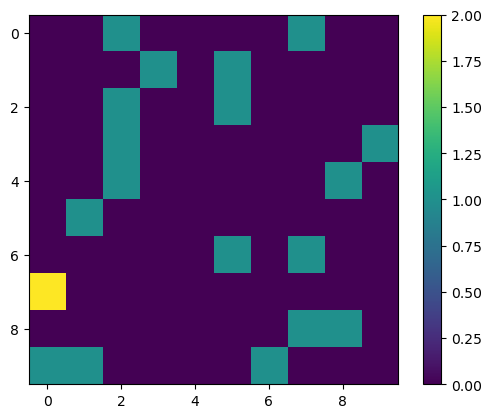

In [38]:
# viewing the positions
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

# If running from a text editor or IDE, remember you'll need the following:
plt.show()

# Below is an example of what you should see...